### Description
***
This notebook is for plotting the Norm1 and Norm2 differences between HYCOM output and EN4 analyses in the horizontal dimensions.

The two sets of plots are defined by the following two equations, defining the Norms. Firstly, Norm1:

$$\frac{\text{ERROR}_{FREE} - \text{ERROR}_{EnOI}}{\text{ERROR}_{FREE}} \times 100$$

where the "ERROR" is defined as the '*mean absolute error*' and is the absolute difference between the EnOI run and the reference data, in this case the EN4 analysis. So the $\text{ERROR}_{EnOI/FREE}$ can be defined as $|\text{EnOI} - \text{EN4}|$.

Secondly, Norm2:

$$\frac{\text{RMSE}_{FREE} - \text{RMSE}_{EnOI}}{\text{RMSE}_{FREE}} \times 100$$

where the RMSE is calculated using the EN4 analysis as the 'truth' dataset.

***

The EN4-transformed HYCOM data used in these scripts was generated on Fram by:
1. Linking weekly averages into a single directory; then
2. Using `hycave` to create a monthly mean from the weekly averages; then
3. Renaming the hycave output prefixes to be recognised by hyc2proj; then
4. Performing `hyc2proj` with depths matching the EN4 objective analysis; and
5. Finally performing `ncrcat` to create a single netcdf of all the data.

### From Francois's email:
***
***1)*** 
**Norm1** is equivalent to **mean absolute error**. 

In other word: $\text{mean} | (\text{obs}(:) - \text{mod}(:) |$


**Norm2** is equivalant to **RMSE**.

In other word: $\sqrt{(\text{mean}(\text{obs}(:) - \text{mod}(:))^{2})}$

**Bias** is $\text{mean}(\text{mod}) - \text{mean}(\text{obs})$

as bias can be negative you must take the abs before comparing two simulation 

e.g. plotting $|(\text{bias_free})| - |(\text{bias_assim})|$



***2)***
the *100 should be around parenthesis 

$(\frac{\text{error_free} - \text{error_assim}}{\text{error_free}}) * 100$

if error_free==error_assim ==> you get 0 (assim has not reduced error

if error_assim=0 ==> you get 100% you (have reduce all the error)

if error assim=2*error_free you get -100% (you have degraded the error)

Try to understand formula with simpler example like that
***

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import xarray as xr
from scipy import stats

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
plt.rcParams['figure.facecolor']='white'
plt.rcParams['axes.facecolor']='white'

In [3]:
# loading EN4 analysis data
ds_EN4 = xr.open_dataset('../Data/EN4_regional.nc')
ds_EN4 = ds_EN4.sel(time=slice('2009-01','2009-09'))
ds_EN4['temperature'] = ds_EN4['temperature'] - 273.15
ds_EN4 = ds_EN4.rename({'lat': 'latitude', 'lon': 'longitude'})


# loading HYCOMcci data
ds_hycomcci = xr.open_dataset('../Data/HYCOM_EN4_horizontal/CCI_SEN25_EN4H.nc')
ds_hycomcci['time'].values = ds_EN4['time'].values
ds_hycomcci['latitude'].values = ds_EN4['latitude'].values
ds_hycomcci['longitude'].values = ds_EN4['longitude'].values
ds_hycomcci['depth'].values = ds_EN4['depth'].values


# loading OSTIA data
ds_hycomostia = xr.open_dataset('../Data/HYCOM_EN4_horizontal/OSTIA_SEN30_EN4H.nc')
ds_hycomostia['time'].values = ds_EN4['time'].values
ds_hycomostia['latitude'].values = ds_EN4['latitude'].values
ds_hycomostia['longitude'].values = ds_EN4['longitude'].values
ds_hycomostia['depth'].values = ds_EN4['depth'].values


# loading AVHRR data
ds_hycomTSSTL2 = xr.open_dataset('../Data/HYCOM_EN4_horizontal/TSSTL2_SEN50_EN4H.nc')
ds_hycomTSSTL2['time'].values = ds_EN4['time'].values
ds_hycomTSSTL2['latitude'].values = ds_EN4['latitude'].values
ds_hycomTSSTL2['longitude'].values = ds_EN4['longitude'].values
ds_hycomTSSTL2['depth'].values = ds_EN4['depth'].values


# loading ATSR data
ds_hycomTSSTL3 = xr.open_dataset('../Data/HYCOM_EN4_horizontal/TSSTL3_SEN40_EN4H.nc')
ds_hycomTSSTL3['time'].values = ds_EN4['time'].values
ds_hycomTSSTL3['latitude'].values = ds_EN4['latitude'].values
ds_hycomTSSTL3['longitude'].values = ds_EN4['longitude'].values
ds_hycomTSSTL3['depth'].values = ds_EN4['depth'].values


# loading HYCOMFree data
ds_hycomfree = xr.open_dataset('../Data/HYCOM_EN4_horizontal/FREE_EN4H.nc')
ds_hycomfree['time'].values = ds_EN4['time'].values
ds_hycomfree['latitude'].values = ds_EN4['latitude'].values
ds_hycomfree['longitude'].values = ds_EN4['longitude'].values
ds_hycomfree['depth'].values = ds_EN4['depth'].values

## Creating the Norms

In [4]:
# Defining functions to calculate absolute error and RMSE
def abs_err(dataset,variable):
    absolute_error = np.mean(np.absolute(ds_EN4[variable] - dataset[variable]), axis=0)
    return absolute_error

def rmse(dataset,variable):
    rmse_ = np.sqrt(np.mean((ds_EN4[variable] - dataset[variable])**2, axis=0))
    return rmse_

In [5]:
# Norm 1 (Mean absolute error)
#==========================================================================================

# norm for CCI analysis
cci_sst_norm1 = ((abs_err(ds_hycomfree,'temperature') - abs_err(ds_hycomcci,'temperature')) / abs_err(ds_hycomfree,'temperature')) * 100
cci_sst_norm2 = ((rmse(ds_hycomfree,'temperature') - rmse(ds_hycomcci,'temperature')) / rmse(ds_hycomfree,'temperature')) * 100

cci_sal_norm1 = ((abs_err(ds_hycomfree,'salinity') - abs_err(ds_hycomcci,'salinity')) / abs_err(ds_hycomfree,'salinity')) * 100
cci_sal_norm2 = ((rmse(ds_hycomfree,'salinity') - rmse(ds_hycomcci,'salinity')) / rmse(ds_hycomfree,'salinity')) * 100

# norm for OSTIA analysis
ostia_sst_norm1 = ((abs_err(ds_hycomfree,'temperature') - abs_err(ds_hycomostia,'temperature')) / abs_err(ds_hycomfree,'temperature')) * 100
ostia_sst_norm2 = ((rmse(ds_hycomfree,'temperature') - rmse(ds_hycomostia,'temperature')) / rmse(ds_hycomfree,'temperature')) * 100

ostia_sal_norm1 = ((abs_err(ds_hycomfree,'salinity') - abs_err(ds_hycomostia,'salinity')) / abs_err(ds_hycomfree,'salinity')) * 100
ostia_sal_norm2 = ((rmse(ds_hycomfree,'salinity') - rmse(ds_hycomostia,'salinity')) / rmse(ds_hycomfree,'salinity')) * 100

# norm for TSSTL2
TSSTL2_sst_norm1 = ((abs_err(ds_hycomfree,'temperature') - abs_err(ds_hycomTSSTL2,'temperature')) / abs_err(ds_hycomfree,'temperature')) * 100
TSSTL2_sst_norm2 = ((rmse(ds_hycomfree,'temperature') - rmse(ds_hycomTSSTL2,'temperature')) / rmse(ds_hycomfree,'temperature')) * 100

TSSTL2_sal_norm1 = ((abs_err(ds_hycomfree,'salinity') - abs_err(ds_hycomTSSTL2,'salinity')) / abs_err(ds_hycomfree,'salinity')) * 100
TSSTL2_sal_norm2 = ((rmse(ds_hycomfree,'salinity') - rmse(ds_hycomTSSTL2,'salinity')) / rmse(ds_hycomfree,'salinity')) * 100

# norm for TSSTL3
TSSTL3_sst_norm1 = ((abs_err(ds_hycomfree,'temperature') - abs_err(ds_hycomTSSTL3,'temperature')) / abs_err(ds_hycomfree,'temperature')) * 100
TSSTL3_sst_norm2 = ((rmse(ds_hycomfree,'temperature') - rmse(ds_hycomTSSTL3,'temperature')) / rmse(ds_hycomfree,'temperature')) * 100

TSSTL3_sal_norm1 = ((abs_err(ds_hycomfree,'salinity') - abs_err(ds_hycomTSSTL3,'salinity')) / abs_err(ds_hycomfree,'salinity')) * 100
TSSTL3_sal_norm2 = ((rmse(ds_hycomfree,'salinity') - rmse(ds_hycomTSSTL3,'salinity')) / rmse(ds_hycomfree,'salinity')) * 100

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


# 1. NORM1 (Mean Absolute Error)

## 1.1 CCI Temperature

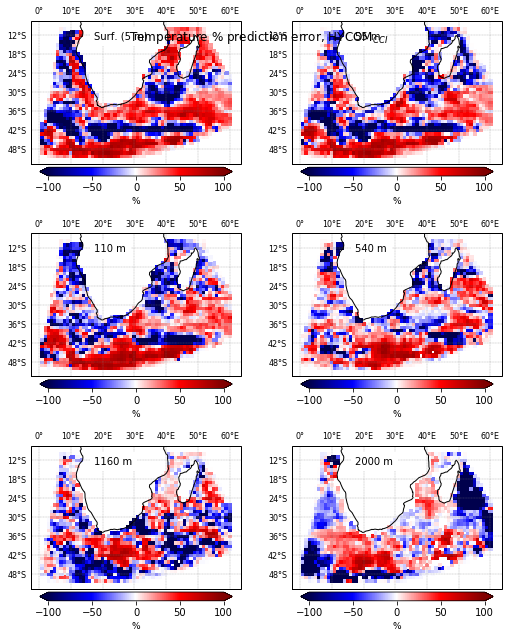

In [15]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature % prediction error, HYCOM$_{CCI}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = cci_sst_norm1[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Temp_Norm1_CCI.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 1.2 CCI Salinity

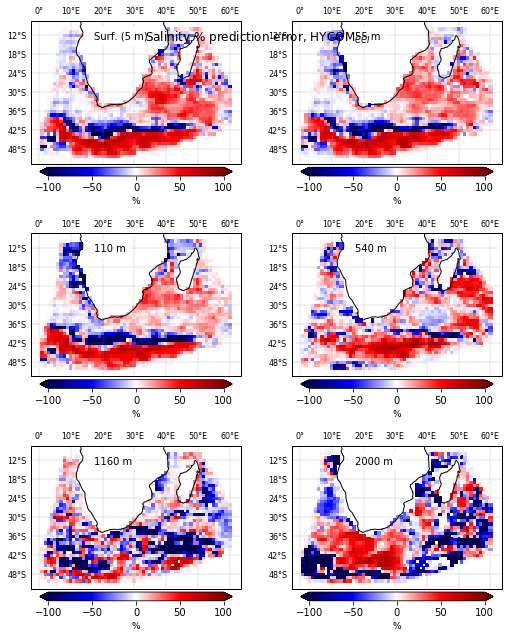

In [16]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity % prediction error, HYCOM$_{CCI}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = cci_sal_norm1[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Sal_Norm1_CCI.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 1.3 OSTIA Temperature

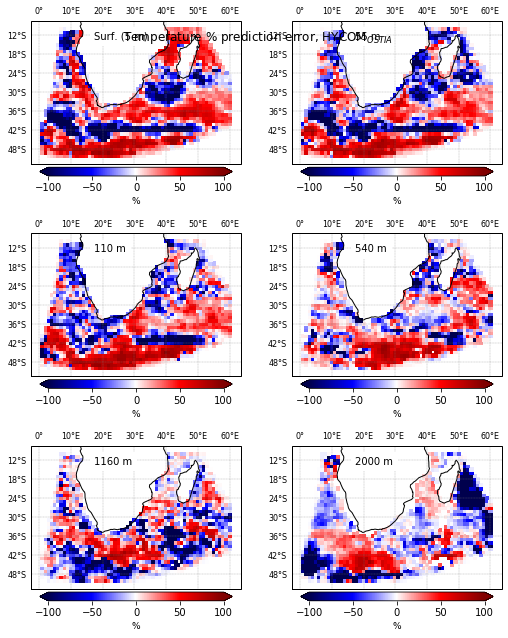

In [20]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature % prediction error, HYCOM$_{OSTIA}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = ostia_sst_norm1[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Temp_Norm1_OSTIA.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 1.4 OSTIA Salinity

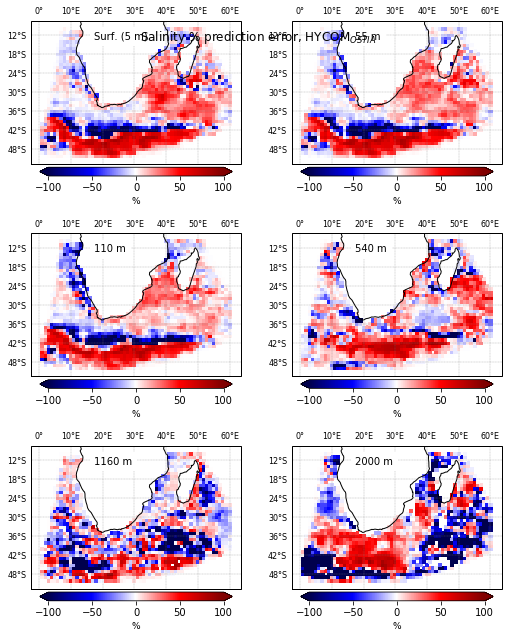

In [21]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity % prediction error, HYCOM$_{OSTIA}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = ostia_sal_norm1[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Sal_Norm1_OSTIA.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 1.5 TSSTL2 Temperature

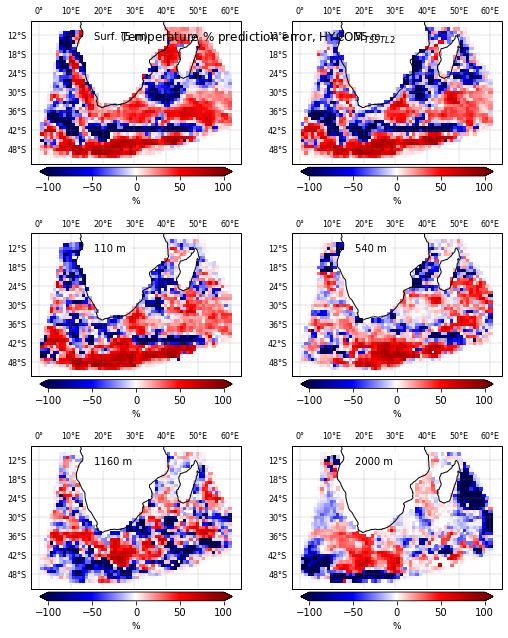

In [22]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature % prediction error, HYCOM$_{TSSTL2}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = TSSTL2_sst_norm1[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Temp_Norm1_TSSTL2.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 1.6 TSSTL2 Salinity

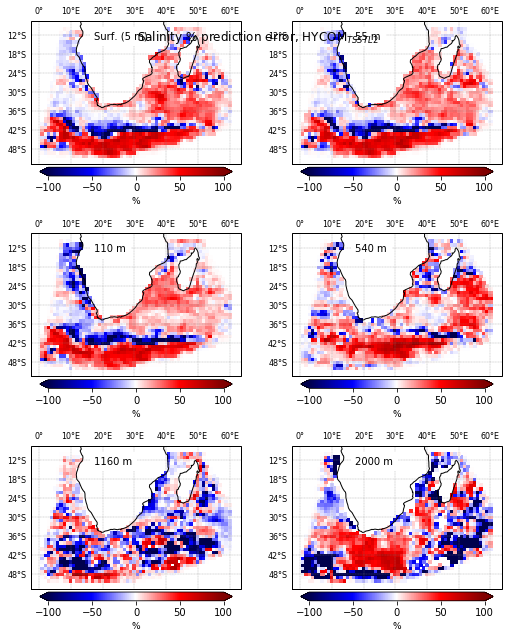

In [23]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity % prediction error, HYCOM$_{TSSTL2}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = TSSTL2_sal_norm1[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Sal_Norm1_TSSTL2.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 1.7 TSSTL3 Temperature

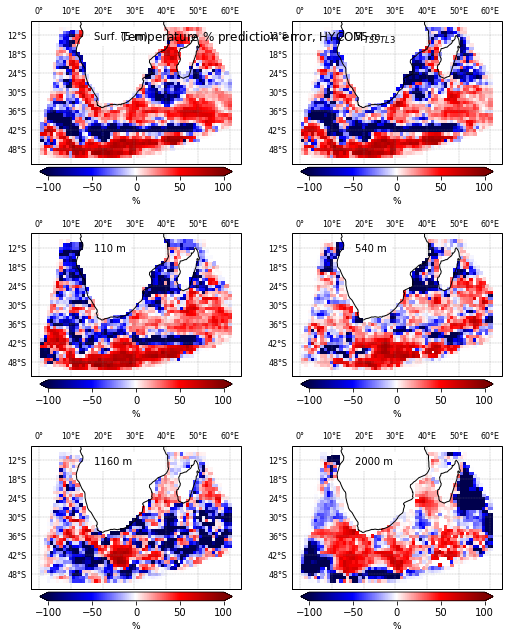

In [24]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature % prediction error, HYCOM$_{TSSTL3}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = TSSTL3_sst_norm1[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Temp_Norm1_TSSTL3.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 1.8 TSSTL3 Salinity

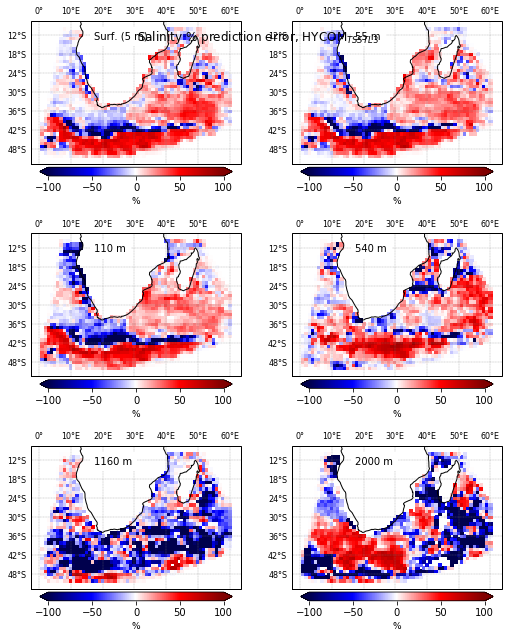

In [25]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity % prediction error, HYCOM$_{TSSTL3}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = TSSTL3_sal_norm1[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Sal_Norm1_TSSTL3.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

# 2. Norm2 (RMSE)

## 2.1 CCI Temperature

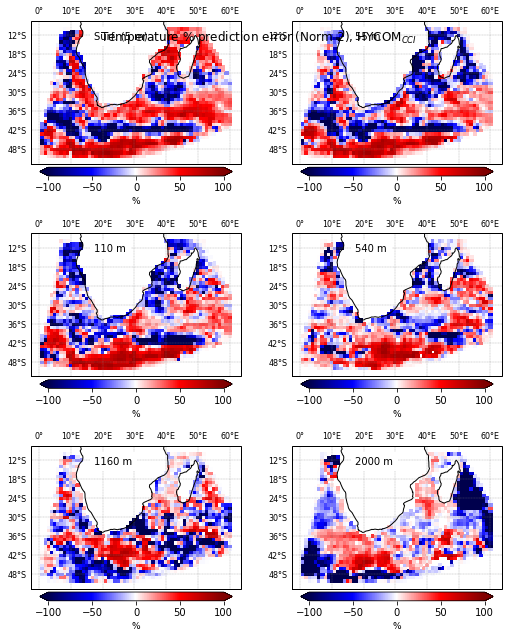

In [26]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature % prediction error (Norm 2), HYCOM$_{CCI}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = cci_sst_norm2[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Temp_Norm2_CCI.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 2.2 CCI Salinity

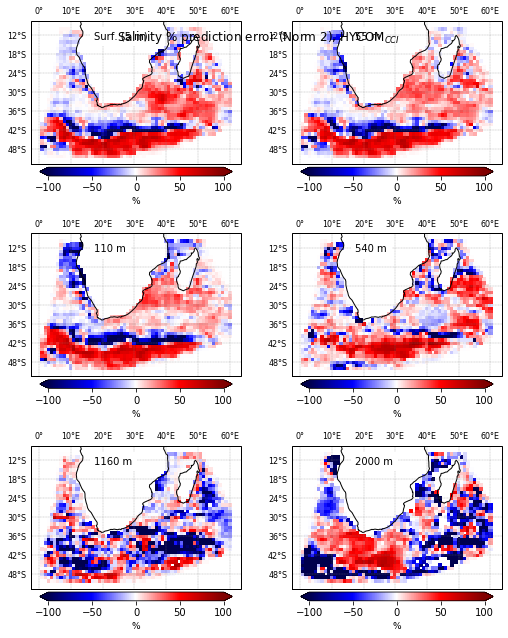

In [27]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity % prediction error (Norm 2), HYCOM$_{CCI}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = cci_sal_norm2[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Sal_Norm2_CCI.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 2.3 OSTIA Temperature

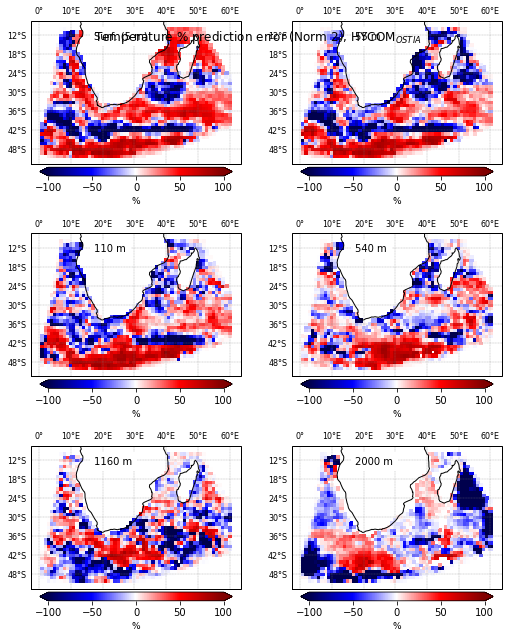

In [28]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature % prediction error (Norm 2), HYCOM$_{OSTIA}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = ostia_sst_norm2[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Temp_Norm2_OSTIA.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 2.4 OSTIA Salinity

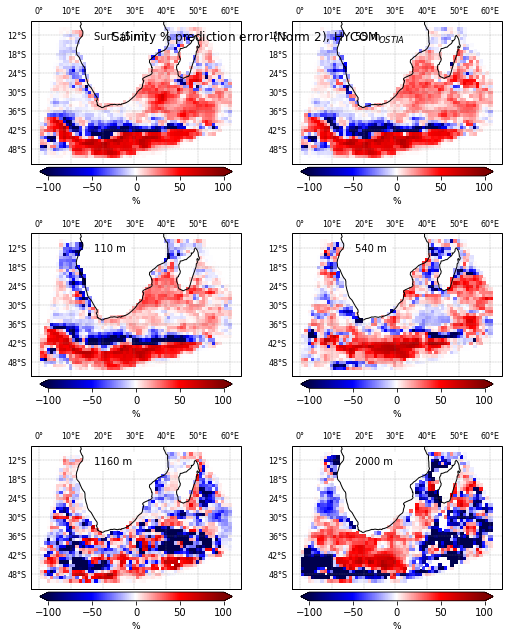

In [29]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity % prediction error (Norm 2), HYCOM$_{OSTIA}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = ostia_sal_norm2[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Sal_Norm2_OSTIA.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 2.5 TSSTL2 Temperature

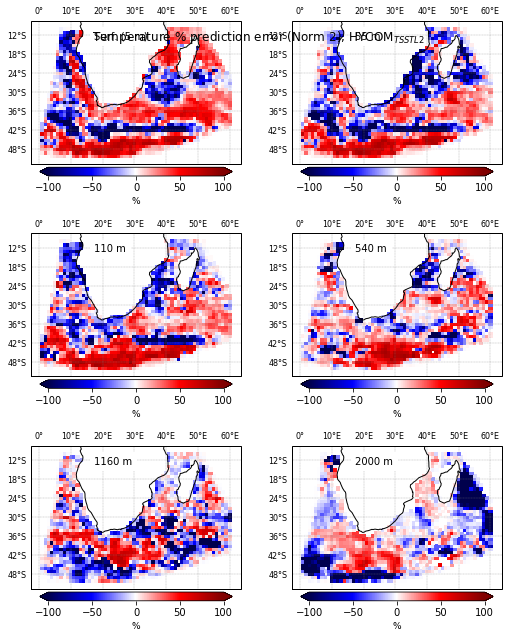

In [30]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature % prediction error (Norm 2), HYCOM$_{TSSTL2}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = TSSTL2_sst_norm2[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Temp_Norm2_TSSTL2.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 2.6 TSSTL2 Salinity

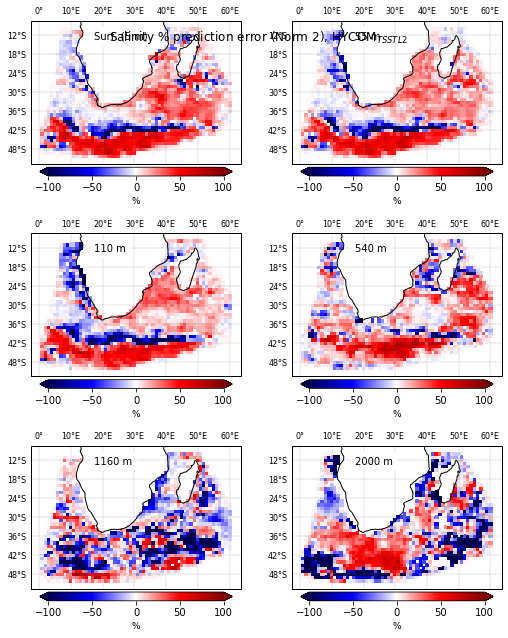

In [32]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity % prediction error (Norm 2), HYCOM$_{TSSTL2}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = TSSTL2_sal_norm2[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Sal_Norm2_TSSTL2.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 2.7 TSSTL3 Temperature

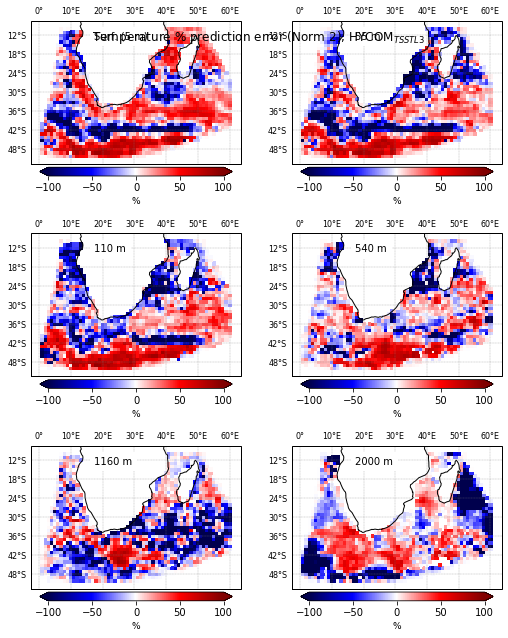

In [33]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature % prediction error (Norm 2), HYCOM$_{TSSTL3}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = TSSTL3_sst_norm2[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Temp_Norm2_TSSTL3.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 2.8 TSSTL3 Salinity

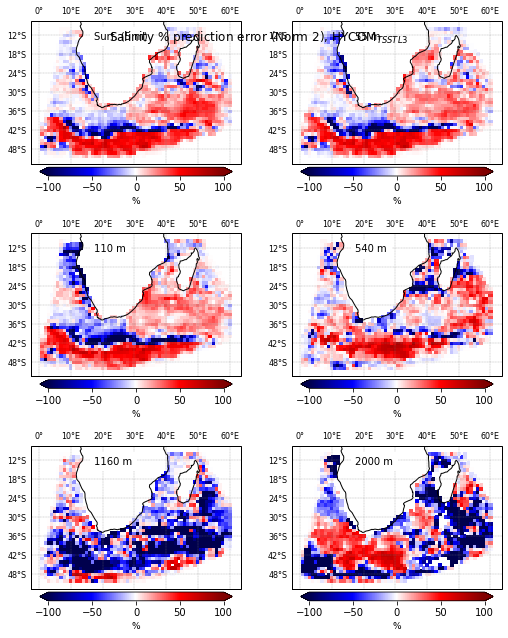

In [34]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity % prediction error (Norm 2), HYCOM$_{TSSTL3}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = TSSTL3_sal_norm2[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Sal_Norm2_TSSTL3.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

# 3. Horizontal RMSE

### Creating the RMSE variables

In [7]:
# Creating RMSE for CCI analysis
cci_temp_rmse = rmse(ds_hycomcci,'temperature')
cci_sal_rmse = rmse(ds_hycomcci,'salinity')

# Creating RMSE for OSTIA analysis
ostia_temp_rmse = rmse(ds_hycomostia,'temperature')
ostia_sal_rmse = rmse(ds_hycomostia,'salinity')

# Creating RMSE for CCI TSSTL2 AVHRR
TSSTL2_temp_rmse = rmse(ds_hycomTSSTL2,'temperature')
TSSTL2_sal_rmse = rmse(ds_hycomTSSTL2,'salinity')

# Creating RMSE for CCI TSSTL3 ATSR
TSSTL3_temp_rmse = rmse(ds_hycomTSSTL3,'temperature')
TSSTL3_sal_rmse = rmse(ds_hycomTSSTL3,'salinity')

# Creating RMSE for HYCOM FREE
free_temp_rmse = rmse(ds_hycomfree,'temperature')
free_sal_rmse = rmse(ds_hycomfree,'salinity')

## 3.1 CCI Temperature

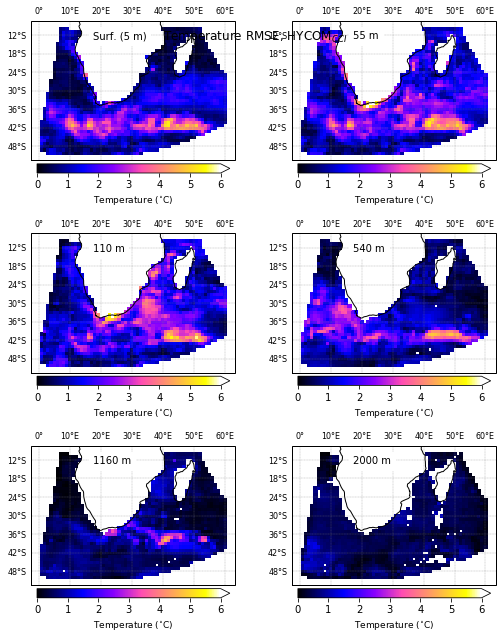

In [57]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature RMSE, HYCOM$_{CCI}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = cci_temp_rmse[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('gnuplot2'), add_colorbar=False, vmin=0, vmax=6)
    cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Temp_RMSE_CCI.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 3.2 CCI Salinity

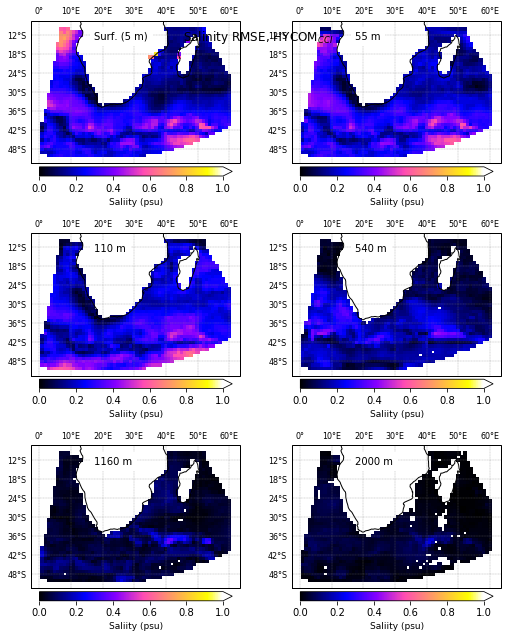

In [8]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity RMSE, HYCOM$_{CCI}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = cci_sal_rmse[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('gnuplot2'), add_colorbar=False, vmin=0, vmax=1)
    cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
    cbar.set_label('Saliity (psu)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Sal_RMSE_CCI.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 3.3 OSTIA Temperature

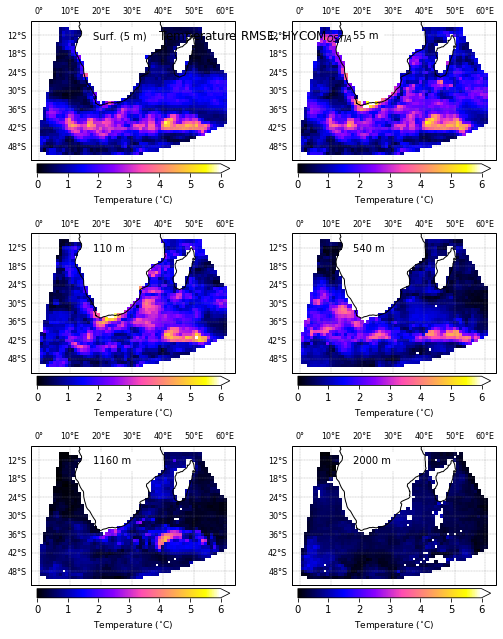

In [59]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature RMSE, HYCOM$_{OSTIA}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = ostia_temp_rmse[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('gnuplot2'), add_colorbar=False, vmin=0, vmax=6)
    cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Temp_RMSE_OSTIA.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 3.4 OSTIA Salinity

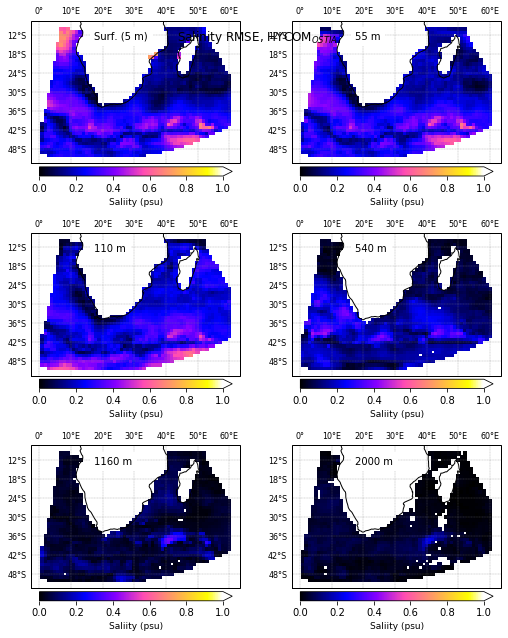

In [60]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity RMSE, HYCOM$_{OSTIA}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = ostia_sal_rmse[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('gnuplot2'), add_colorbar=False, vmin=0, vmax=1)
    cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
    cbar.set_label('Saliity (psu)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Sal_RMSE_OSTIA.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 3.5 TSSTL2 Temperature

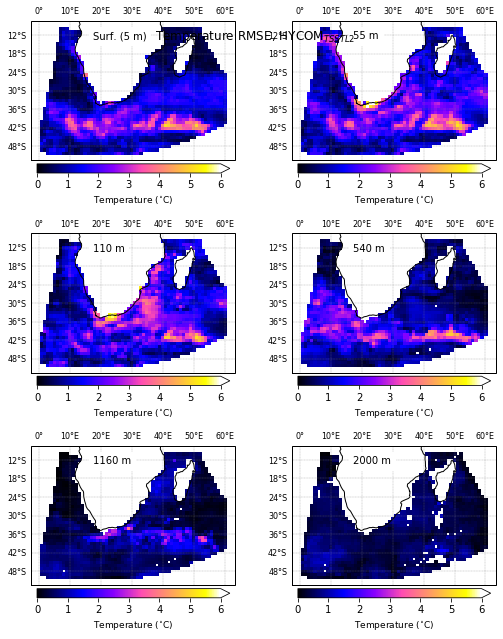

In [61]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature RMSE, HYCOM$_{TSSTL2}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = TSSTL2_temp_rmse[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('gnuplot2'), add_colorbar=False, vmin=0, vmax=6)
    cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Temp_RMSE_TSSTL2.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 3.6 TSSTL2 Salinity

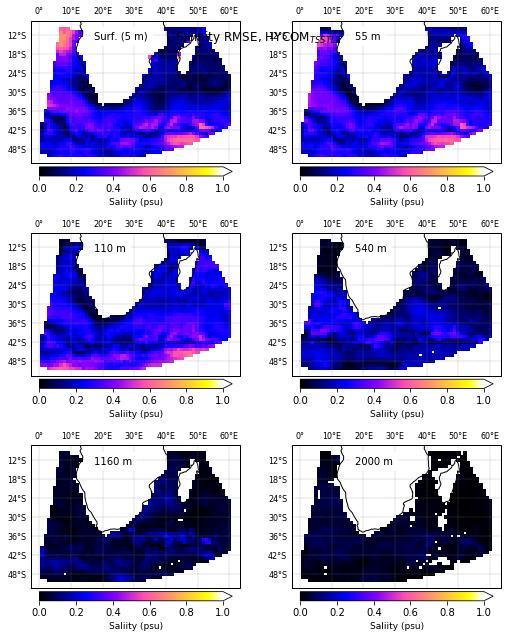

In [62]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity RMSE, HYCOM$_{TSSTL2}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = TSSTL2_sal_rmse[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('gnuplot2'), add_colorbar=False, vmin=0, vmax=1)
    cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
    cbar.set_label('Saliity (psu)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Sal_RMSE_TSSTL2.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 3.7 TSSTL3 Temperature

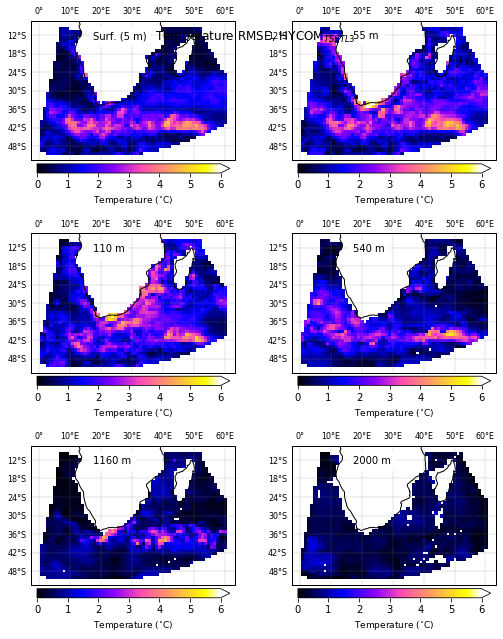

In [63]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature RMSE, HYCOM$_{TSSTL3}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = TSSTL3_temp_rmse[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('gnuplot2'), add_colorbar=False, vmin=0, vmax=6)
    cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Temp_RMSE_TSSTL3.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 3.8 TSSTL3 Salinity

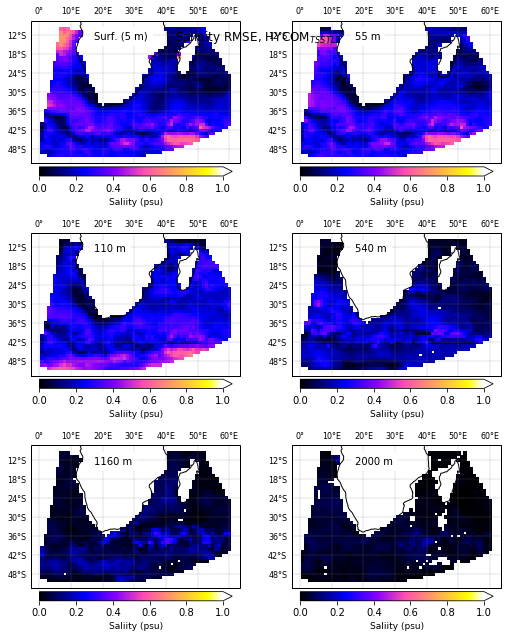

In [64]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity RMSE, HYCOM$_{TSSTL3}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = TSSTL3_sal_rmse[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('gnuplot2'), add_colorbar=False, vmin=0, vmax=1)
    cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
    cbar.set_label('Saliity (psu)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Sal_RMSE_TSSTL3.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 3.9 HYCOM<sub>FREE</sub> Temperature

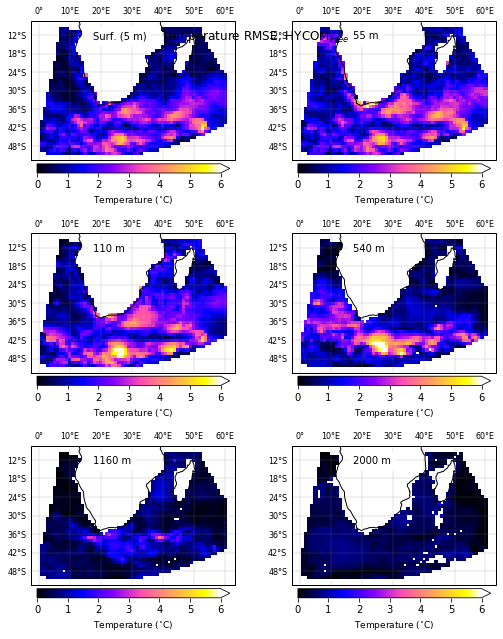

In [66]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature RMSE, HYCOM$_{Free}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = free_temp_rmse[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('gnuplot2'), add_colorbar=False, vmin=0, vmax=6)
    cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Temp_RMSE_Free.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 3.10 HYCOM<sub>FREE</sub> Salinity

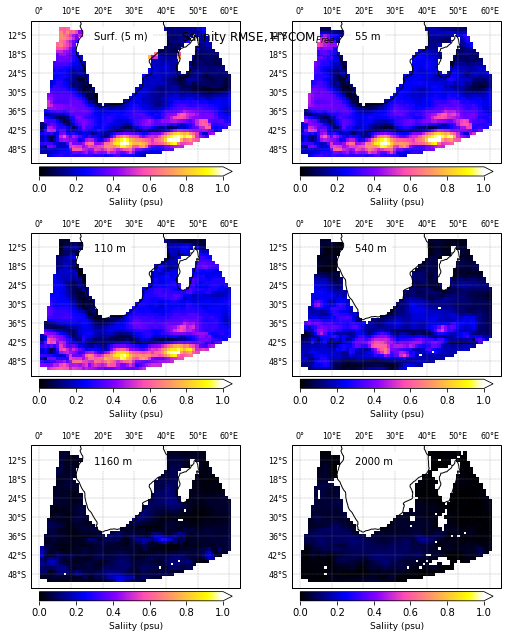

In [68]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity RMSE, HYCOM$_{Free}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = free_sal_rmse[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('gnuplot2'), add_colorbar=False, vmin=0, vmax=1)
    cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
    cbar.set_label('Saliity (psu)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Sal_RMSE_Free.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()